<img src="https://github.com/djp840/MSDS_432_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS432 - Assignment 05 - Exploring Hashing

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import string
import random

### Mount Google Drive to Colab Environment

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Function Linear Search

The linear search function below will run through a list, or array,of numbers/strings and pull the index where a select number/string was found, similar to the bimary search function. But a linear search runs through each index beginning with the first index and searching until it finds the select number. For example, given a list of sorted numbers 1 through 100, it will first search 1, then 2, then 3, then so on until it finds the select number. Thus, if the number being search for is 100, it will take 100 steps to find the number, whereas the binary search will only take 7 steps.

In [2]:
def linear_search(list, item):
    low = 0
    high = len(list) - 1
    
    while low <= high:
        guess = list[low]
        if guess == item:
            return low
        low = low + 1
        
    return None

### Function Binary Search 

The binary search function below will run through a list, or array, of numbers/strings and pull the index where a select number/string was found. If not found, it will return none. This is an incredibly powerful algorithm. For example, given a list of sorted numbers 1 through 100, the algorithm will begin its search for the select number at the middploint, position 50. If the number at position 50 is higher than the select number, all positions 50 and above have now been eliminated. If the number at position 50 is lower than the select number, all position 50 and below have now been eliminated. Every time, you guess the middle number and eliminate half the remaining numbers. Thus, if the number being searched for is 100, it will take only 7 steps to find the number.

In [3]:
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1

  # Item doesn't exist
  return None

To create a list of 100 random names, assign random letters to a list and join them to create one single string. Do so until the list for names is filled with 100 random names.

In [4]:
names = []
for i in range(100):
    names_temp = []
    for j in range(10):
        names_temp.append(random.choice(string.ascii_lowercase))
    names.append(''.join(names_temp))

Select 5 names at random from the list of names to be used in simple search and dictionary search. 

In [5]:
names_search = random.sample(names, 5)

### Linear Search

Search the five names in the list of names using linear search. Record the execution time in milliseconds for each name search and add up the amount of time. Repeat this 1000 times and take the average execution time

In [6]:
linear_search_times = []

for i in range(1000):
    linear_search_time = 0
    for j in range(len(names_search)):
        start = time.clock()
        linear_search(names, names_search[j])
        end = time.clock()
        linear_search_time += ((end - start) * 1000)
    linear_search_times.append(linear_search_time)
    
linear_search_time = np.mean(linear_search_times)

A dictionary in python is used as a hash table. It is simple and very efficient in searching for items such as names in a dictionary. The function below will searcht the dictionary and return the value corresponding to the name in the dictionary.

In [7]:
def dict_search(dictionary, item):
    for items in item:
        return dictionary[items]

First store the list of names in a dictionary. Each name will have a random value assigned to it in the dicitonary. Next, search for the five names in the dictionary and return the execution time in milliseconds. Repeat this 1000 times and take the average execution time.

In [8]:
names_dict = {k: v for v, k in enumerate(names)}
dict_times = []

for i in range(1000):
    start = time.clock()
    dict_search(names_dict, names_search)
    end = time.clock()
    dict_times.append((end - start) * 1000)

dict_search_time = np.mean(dict_times)

### Plot Execution Times

Plot the execution time in milliseconds for the search of the five random names using linear search and dictionary search. As seen below, the dictionary search was much quicker than the linear search. Linear search has a Big O notation of O(n), which means that it will begin its search at the first index, then the second, and so on until it finds the value being searched for. So if the name is in the 50th index, it will take 50 steps to find the name. However, the dictionary knows exactly where the name is and will return its value almost immediately since it doesn't have to search through the dictionary for the name. It just simply knows where it is.

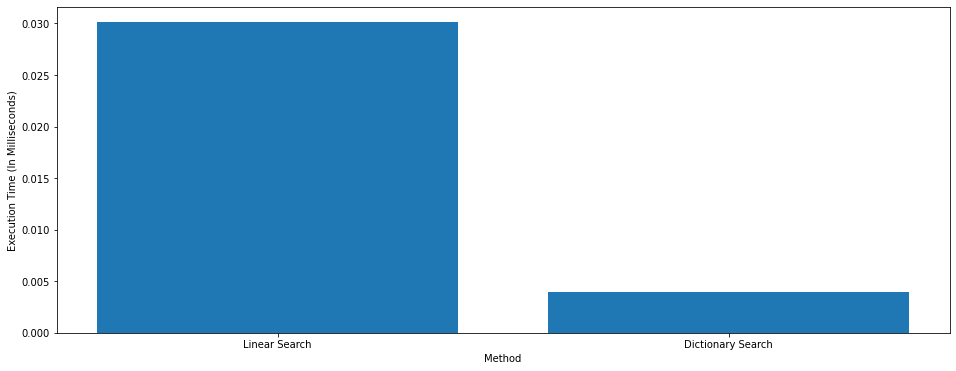

In [9]:
method = ['Linear Search', 'Dictionary Search']
times = [linear_search_time, dict_search_time]

y_pos = np.arange(len(method))
plt.figure(figsize=(16, 6))
plt.bar(y_pos, times)
plt.xticks(y_pos, method)
plt.xlabel('Method')
plt.ylabel('Execution Time (In Milliseconds)')
plt.show()

### Simple Sort Function

The simple sort algorithm sorts the list of numbers/strings by beginning with the first inde and searching for a smaller number/string following it. If one exists, the two indexes are swapped so now the smaller number/string is in the first index. This smaller number/string is now compared to the following numbers/strings to see if a smaller number/string exists. If so, then swap positions again so the smaller number/string is in the first index. Continue to do so until the entire length of the list has been checked. Now the smallest number/string has been found. Next, begin with the second index and compare to the following numbers/strings to see if a smaller number/string exists. If so, then swap positions and continue the search to see if a smaller number/string exists. Do so until the entire length of the list has been searched. Now the second smallest number/string has been found and in the second index. Continue this process until the last index has been compared with the last index. The list will now be sorted.

In [10]:
def simpleSort(arr):
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
                
    return arr

The simple sort method is used to sort the list because it is efficient for small lists. If the list contained thousands of names, then a more sophisticated sorting method such as selection sort would have been used. However, as mentioned since the list is small, simple sort will suffice and will run quickly.

In [11]:
names_sorted = simpleSort(names)

### Grab the names at the 10th, 30th, 50th, 70th, 90th, and 100th position to be searched 

In [12]:
temp_names = [names_sorted[9]
              ,names_sorted[29]
              ,names_sorted[49]
              ,names_sorted[69]
              ,names_sorted[89]
              ,names_sorted[99]]

Search the names at these positions using linear search. Record the execution time in milliseconds for each name search and add up the amount of time. Repeat this 1000 times and take the average execution time. 

In [13]:
linear_search_times2 = []

for i in range(10):
    linear_search_time = 0
    for j in range(len(temp_names)):
        start = time.clock()
        linear_search(names_sorted, temp_names[j])
        end = time.clock()
        linear_search_time += ((end - start) * 1000)
    linear_search_times2.append(linear_search_time)

linear_search_time2 = np.mean(linear_search_times2)

Search the names at these positions using binary search. Record the execution time in milliseconds for each name search and add up the amount of time. Repeat this 1000 times and take the average execution time. 

In [14]:
binary_search_times = []

for i in range(10):
    binary_search_time = 0
    for j in range(len(temp_names)):
        start = time.clock()
        binary_search(names_sorted, temp_names[j])
        end = time.clock()
        binary_search_time += ((end - start) * 1000)
    binary_search_times.append(binary_search_time)

binary_search_time = np.mean(binary_search_times)

Search for the names at these positions in the dictionary and return the execution time in milliseconds. Repeat this 1000 times and take the average execution time. 

In [15]:
for i in range(1000):
    start = time.clock()
    dict_search(names_dict, temp_names)
    end = time.clock()
    dict_times.append((end - start) * 1000)

dict_search_time = np.mean(dict_times)

Plot the execution time in milliseconds for the search of the names at the specfified positions using linear search, binary search, and dictionary search. As seen below, the dictionary search was much quicker than the linear search and binary search. This is not surprising since as mentioned with the comparison above between dictionary and linear search, the dictionary search knows exactly where the name is and does not need to search through the dictionary. Thus, it has a Big O notation of O(1). Thus, if quick retrieval is important, it would be advised to store data in a dictionary since it has almost immediate retreival times. 

### Plot Linear Search, Dictionary Search, Binary Search Results

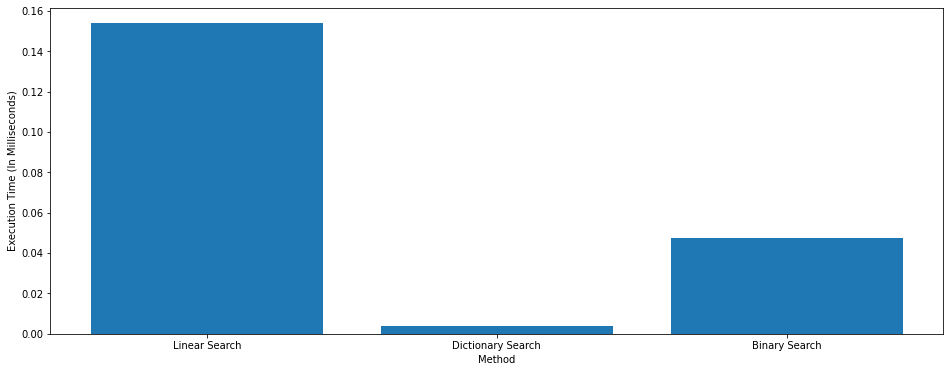

In [16]:
method = ['Linear Search', 'Dictionary Search', 'Binary Search']
times = [linear_search_time2, dict_search_time, binary_search_time]
plt.figure(figsize=(16, 6))
y_pos = np.arange(len(method))
plt.bar(y_pos, times)
plt.xticks(y_pos, method)
plt.xlabel('Method')
plt.ylabel('Execution Time (In Milliseconds)')
plt.show()